In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
# df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")

df = pd.read_csv('IMDB Dataset.csv')

In [34]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [35]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [36]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [38]:
df.duplicated().sum()

418

In [39]:
df = df.drop_duplicates()

In [40]:
# Cleaning

# lower case
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
df['review'] = df['review'].str.lower()

In [42]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [43]:
# remove whitespaces
df['review']=df['review'].str.strip()

In [44]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [45]:
# remove html tags
df['review'] = df['review'].str.replace('<br />', ' ', regex=False)

In [46]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming t...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [47]:
# http://campusx.in www.campusx.in www.campusx.co.in

def remove_url(data):
    data=re.sub(r"https?://\S+|www\.\S+",'',data)
    return data

In [48]:
# code to remove a URL
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+",'')

In [49]:
# code to check if a review contains an URL
df[df['review'].str.contains(r"https?://\S+|www\.\S+")].iloc[4].values

array(["this show has to be my favorite out of all the 80's horror tv shows. like tales from the darkside, also from the same creators, this show is a rare gem. if you agree with me, please sign this petition i started, to get the word out for monsters and get it out on dvd. here is the petition address: www.petitiononline.com/19784444/petition.html some of my favorite episodes would have to be glim glim, and rain dance. i also loved the opening intro with the monster family. that used to creep me out! one of the things i would have to ask the dvd creators to include would be the organ sound heard right before where the commercial break would be. i don't know if any of you remember that part but that's one of the main things that brings back memories to me. i mean, come on! war of the worlds the tv series already has been released on dvd, so i say monsters, and also tales from the darkside, and friday the 13th the series should be released too! we the fans need to speak our minds! we n

In [50]:
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming t...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [51]:
# expanding abbvr

# expand 
import re 
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    
    return data

In [52]:
df['review'] = df['review'].apply(remove_abb)


In [53]:
df['review']


0        one of the other reviewers has mentioned that ...
1        a wonderful little production.   the filming t...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    I am going to have to disagree with the previo...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [54]:
from textblob import TextBlob

text = "hi I can drve at nigt"
TextBlob(text).correct().string

'hi I can drove at night'

In [55]:
def spelling_correction(text):
    return TextBlob(text).correct().string

In [56]:
# df['review'].apply(spelling_correction)


In [57]:
# punctuation
import string 


In [58]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def remove_puctuation(text):
    
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')
            
    return text

In [60]:
df['review'] = df['review'].apply(remove_puctuation)
df['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production   the filming te...
2    i thought this was a wonderful way to spend ti...
3    basically there is a family where a little boy...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

**Preprocessing**

In [61]:
from nltk.tokenize import word_tokenize

In [62]:
df['review'] = df['review'].astype(str)

# Apply tokenization
df['tokenized_review'] = df['review'].apply(word_tokenize)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Engineer/nltk_data'
    - 'c:\\Users\\Engineer\\OneDrive\\Desktop\\100-Days_ML_DL\\.venv\\nltk_data'
    - 'c:\\Users\\Engineer\\OneDrive\\Desktop\\100-Days_ML_DL\\.venv\\share\\nltk_data'
    - 'c:\\Users\\Engineer\\OneDrive\\Desktop\\100-Days_ML_DL\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\Engineer\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming te...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [ ]:
# stopword removel 


from nltk.corpus import stopwords


In [ ]:
def remove_stopwords(text):
    
    L = []
    for word in text:
        if word not in stopwords.words('english'):
            L.append(word)
            
    return L 

In [ ]:
# import swifter
# df['tokenized_review'] = df['tokenized_review'].swifter.apply(remove_stopwords)  # Fast apply


In [ ]:
# df['tokenized_review']=df['tokenized_review'].apply(remove_stopwords) 

In [ ]:
 # remove_stopwords(['i', 'thought', 'this', 'was', 'a', 'wonderful', 'way', 'to'])

In [ ]:
# stopwords.words('english')

In [ ]:
df.head()

,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming te...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [ ]:
df['review'] = df['tokenized_review'].apply(lambda x:" ".join(x))


In [ ]:
df.head()


,review,sentiment,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin..."
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,..."
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li..."
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon..."


In [ ]:
df['char_len'] =df['review'].str.len()

In [ ]:
df.head()

,review,sentiment,tokenized_review,char_len
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...",1677
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...",936
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...",884
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li...",694
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...",1240


In [ ]:
# words len 
df['word_len']=df['tokenized_review'].apply(len)


In [ ]:
df.head()

,review,sentiment,tokenized_review,char_len,word_len
0,one of the other reviewers has mentioned that ...,positive,"[one, of, the, other, reviewers, has, mentione...",1677,308
1,a wonderful little production the filming tech...,positive,"[a, wonderful, little, production, the, filmin...",936,156
2,i thought this was a wonderful way to spend ti...,positive,"[i, thought, this, was, a, wonderful, way, to,...",884,166
3,basically there is a family where a little boy...,negative,"[basically, there, is, a, family, where, a, li...",694,135
4,petter matteis love in the time of money is a ...,positive,"[petter, matteis, love, in, the, time, of, mon...",1240,225


In [ ]:
import seaborn as sns

In [ ]:
df[df['sentiment'] == 'positive'].char_len

0        1677
1         936
2         884
4        1240
5         637
         ... 
49983     677
49985    1111
49989     940
49992     960
49995     966
Name: char_len, Length: 24884, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


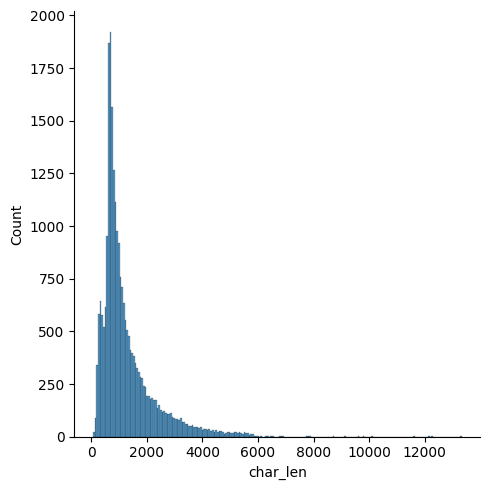

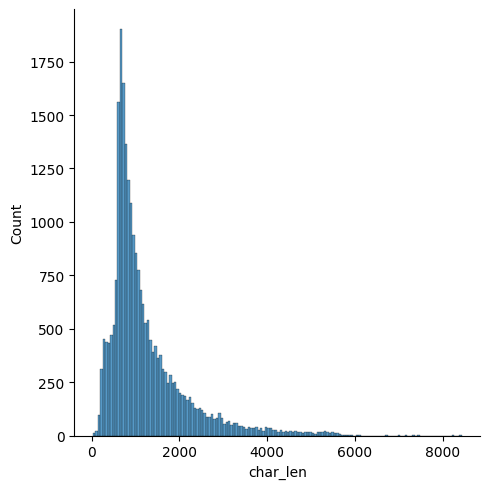

In [ ]:
sns.displot(df[df['sentiment'] == 'positive']['char_len'])
sns.displot(df[df['sentiment'] == 'negative']['char_len'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


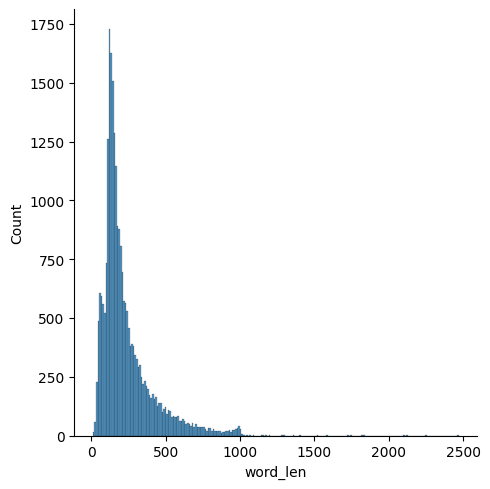

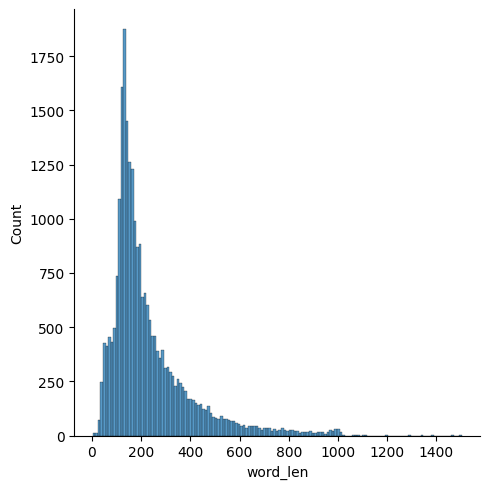

In [ ]:
sns.displot(df[df['sentiment'] == 'positive']['word_len'])
sns.displot(df[df['sentiment'] == 'negative']['word_len'])

In [ ]:
# cooman unigram/tigram/bygram

# from nltk import ngrams
# pd.Series(ngrams(x,3)).value_counts()




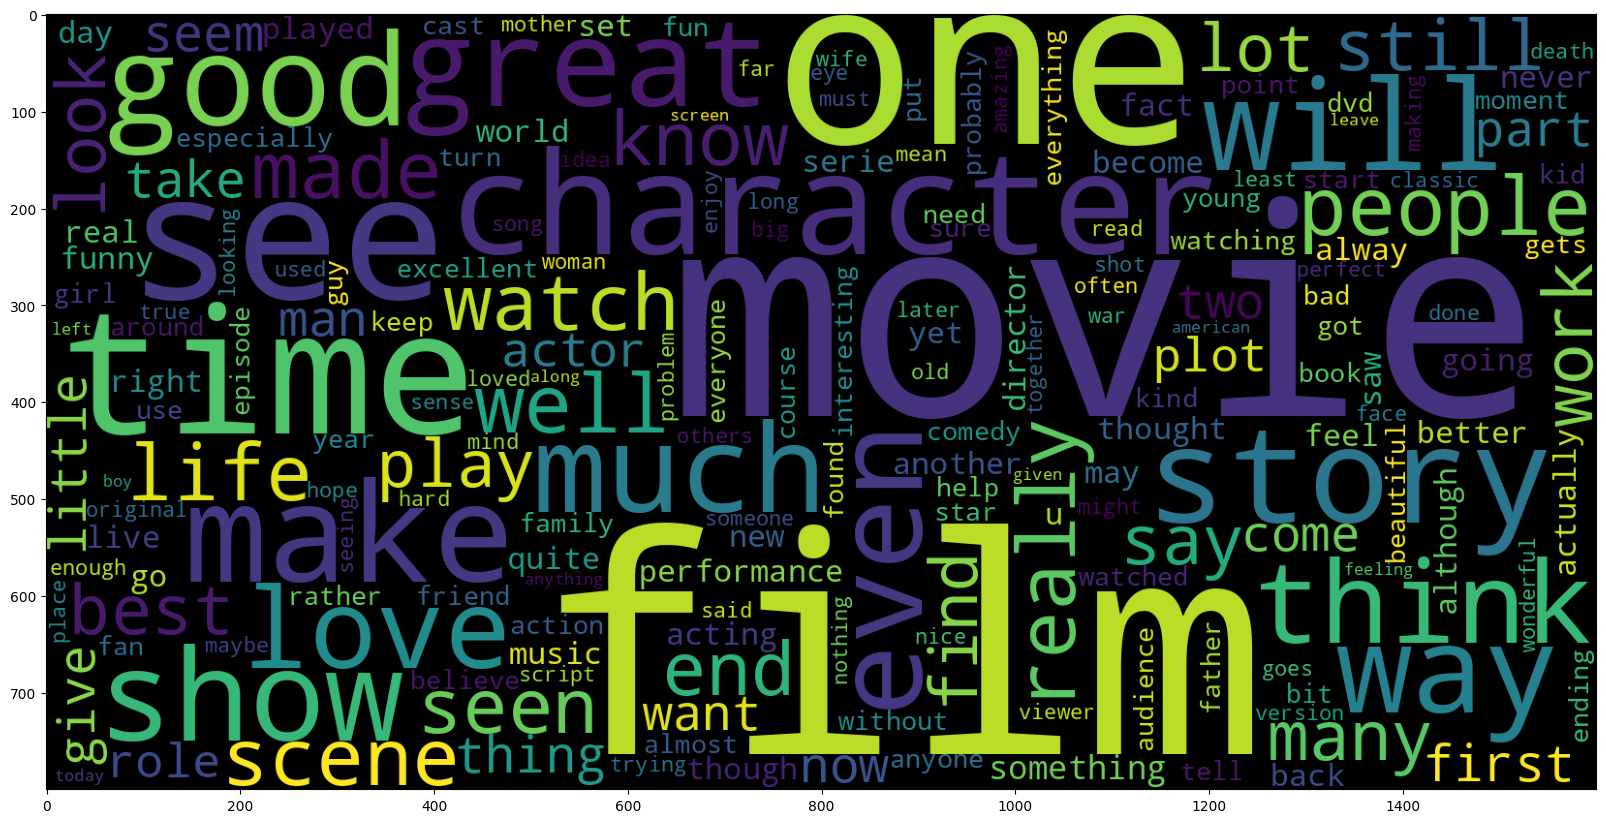

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'positive']['review']))
plt.imshow(wc)

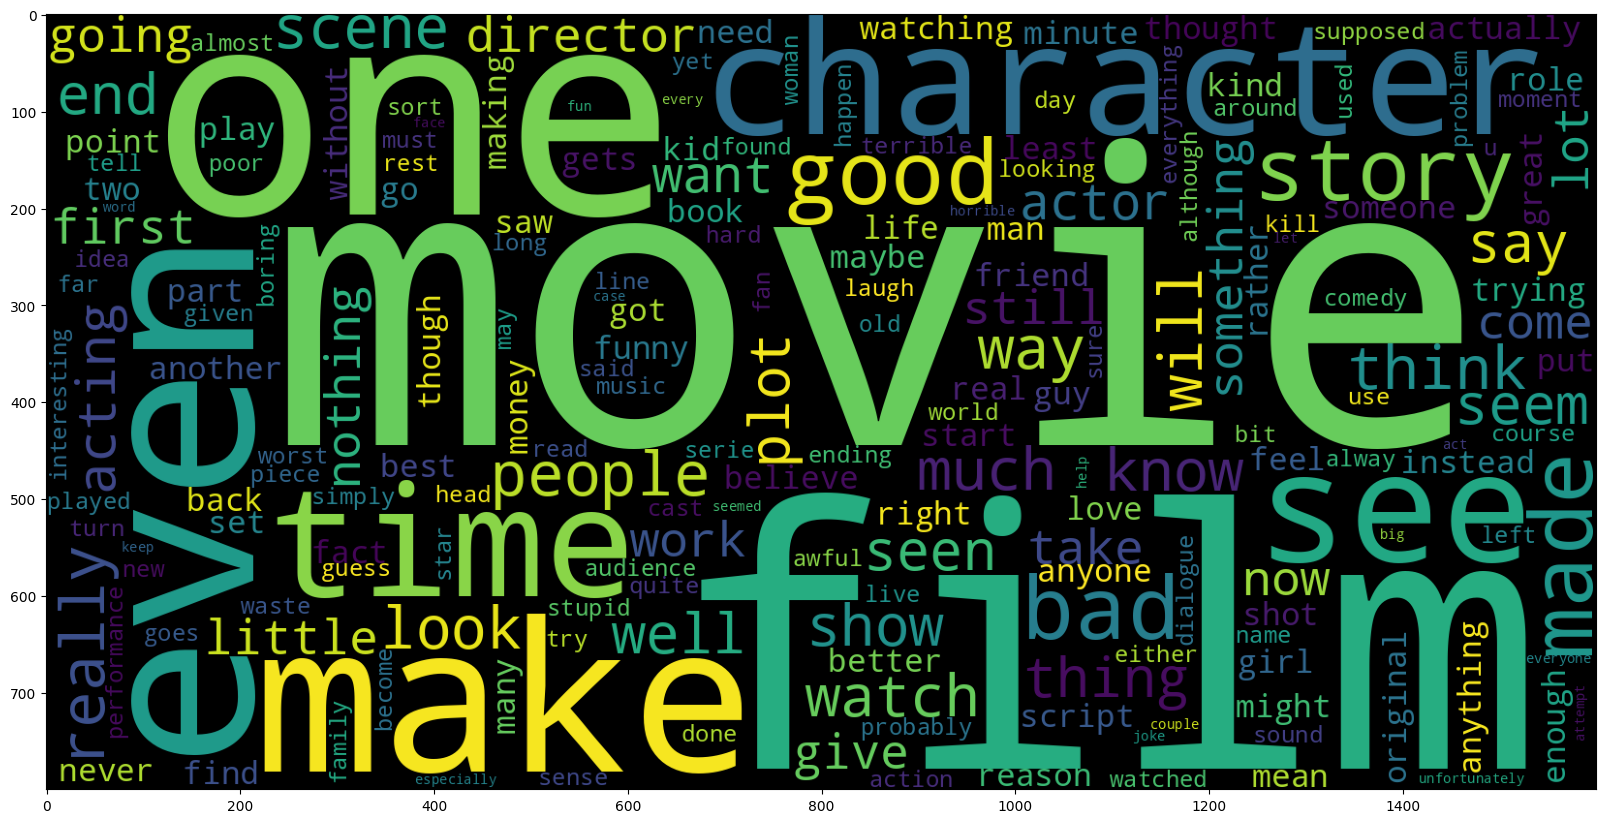

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800).generate(" ".join(df[df['sentiment'] == 'negative']['review']))
plt.imshow(wc)

In [ ]:
# bag of words (BOW)
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])

# ✅ Use get_feature_names_out() instead of get_feature_names()
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=count_vectorizer.get_feature_names_out())




In [ ]:
bag_of_words

,10,100,1010,12,15,1950s,1970s,20,30,40,...,younger,your,your life,your own,your time,yourself,youth,zero,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49577,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,3,0,0,0,0
49578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49580,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.values)

In [ ]:
pca_result.shape


(49582, 2)

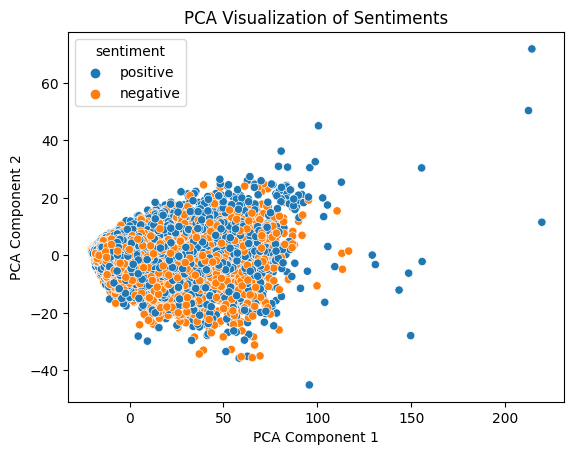

In [ ]:
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['sentiment'])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Sentiments")
plt.show()